<a href="https://colab.research.google.com/github/ThomasTranGithub/6.6.23.Algo.Trading.Strategies/blob/main/standard_deviation_buysellsignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This project is done by python markdown notebook but the runtime type is in R for data analysis purposes
#If running in colab change runtime to R

Modern Financial Markets and Price Dynamics

In [6]:
#load packages

install.packages('quantmod')
install.packages('PerformanceAnalytics')

library(quantmod)
library(xts)
library(zoo)
library(TTR)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




In [55]:
# Install and load the necessary packages
install.packages("quantmod")
library(quantmod)

# Define the stock symbols
symbols <- c("AAPL", "GOOG", "MSFT", "NFLX")

# Specify the start and end dates
start_date <- "2017-01-01"
end_date <- Sys.Date()  # Set it to today's date

# Fetch the historical data
getSymbols(symbols, from = start_date, to = end_date)

# The data will be stored in separate xts objects with the stock symbols as names
# For example, AAPL's data will be stored in the object named AAPL

# Access the loaded data for each stock
AAPL <- Cl(AAPL)  # Closing prices for Apple (AAPL)
GOOG <- Cl(GOOG)  # Closing prices for Google (GOOG)

MSFT <- Cl(MSFT)  # Closing prices for Microsoft (MSFT)
NFLX <- Cl(NFLX)  # Closing prices for Netflix (NFLX)

# Print the first few rows of each dataset
head(AAPL)
head(GOOG)
head(MSFT)
head(NFLX)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "AAPL" "GOOG" "MSFT" "NFLX"

           AAPL.Close
2017-01-03    29.0375
2017-01-04    29.0050
2017-01-05    29.1525
2017-01-06    29.4775
2017-01-09    29.7475
2017-01-10    29.7775

           GOOG.Close
2017-01-03    39.3070
2017-01-04    39.3450
2017-01-05    39.7010
2017-01-06    40.3075
2017-01-09    40.3325
2017-01-10    40.2395

           MSFT.Close
2017-01-03      62.58
2017-01-04      62.30
2017-01-05      62.30
2017-01-06      62.84
2017-01-09      62.64
2017-01-10      62.62

           NFLX.Close
2017-01-03     127.49
2017-01-04     129.41
2017-01-05     131.81
2017-01-06     131.07
2017-01-09     130.95
2017-01-10     129.89

In [57]:
# Calculate daily adjusted returns
returns_AAPL <- dailyReturn(AAPL)
returns_GOOG <- dailyReturn(GOOG)

returns_MSFT <- dailyReturn(MSFT)
returns_NFLX <- dailyReturn(NFLX)

# Merge returns into one dataframe by date
returns_df <- data.frame(Date = index(returns_AAPL),
                         AAPL = coredata(returns_AAPL),
                         GOOG = coredata(returns_GOOG),
                         MSFT = coredata(returns_MSFT),
                         NFLX = coredata(returns_NFLX))

# Print the resulting dataframe
head(returns_df)


,Date,daily.returns,daily.returns.1,daily.returns.2,daily.returns.3
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-03,0.000000000,0.0000000000,0.0000000000,0.0000000000
2,2017-01-04,-0.001119284,0.0009668002,-0.0044743143,0.0150600504
3,2017-01-05,0.005085364,0.0090481378,0.0000000000,0.0185456598
4,2017-01-06,0.011148298,0.0152766609,0.0086677516,-0.0056140676
5,2017-01-09,0.009159479,0.0006202698,-0.0031826983,-0.0009156204
6,2017-01-10,0.001008511,-0.0023058902,-0.0003192921,-0.0080946742


Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


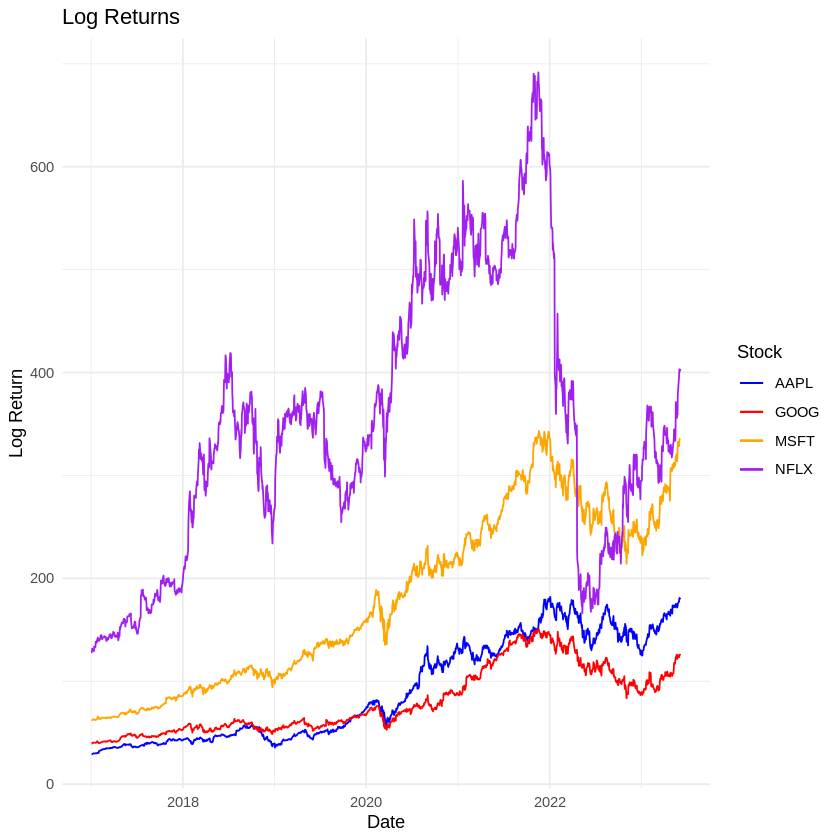

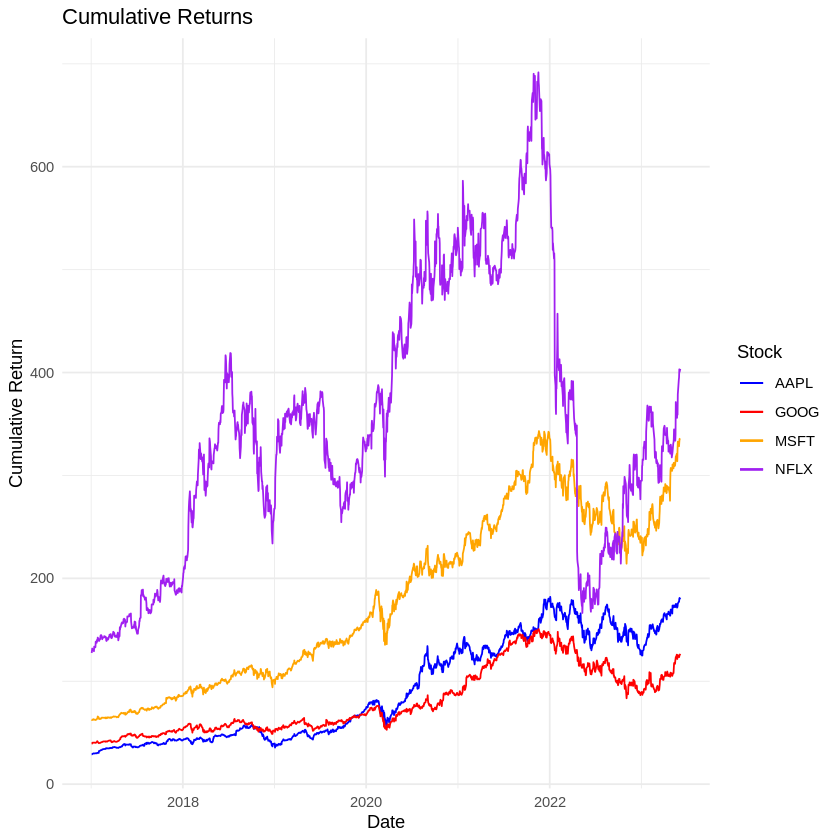

In [58]:
# Calculate log returns
log_returns_AAPL <- diff(log(AAPL))
log_returns_GOOG <- diff(log(GOOG))
log_returns_MSFT <- diff(log(MSFT))
log_returns_NFLX <- diff(log(NFLX))

# Calculate cumulative returns
cumulative_returns_AAPL <- cumprod(1 + log_returns_AAPL) - 1
cumulative_returns_GOOG <- cumprod(1 + log_returns_GOOG) - 1
cumulative_returns_MSFT <- cumprod(1 + log_returns_MSFT) - 1
cumulative_returns_NFLX <- cumprod(1 + log_returns_NFLX) - 1

# Create a dataframe for log returns
log_returns_df <- data.frame(Date = index(log_returns_AAPL),
                             AAPL = coredata(log_returns_AAPL),
                             GOOG = coredata(log_returns_GOOG),
                             MSFT = coredata(log_returns_MSFT),
                             NFLX = coredata(log_returns_NFLX))

# Create a dataframe for cumulative returns
cumulative_returns_df <- data.frame(Date = index(cumulative_returns_AAPL),
                                    AAPL = coredata(cumulative_returns_AAPL),
                                    GOOG = coredata(cumulative_returns_GOOG),
                                    MSFT = coredata(cumulative_returns_MSFT),
                                    NFLX = coredata(cumulative_returns_NFLX))

# Plot the log returns
library(ggplot2)

ggplot(log_returns_df, aes(x = Date)) +
  geom_line(aes(y = AAPL, color = "AAPL")) +
  geom_line(aes(y = GOOG, color = "GOOG")) +
  geom_line(aes(y = MSFT, color = "MSFT")) +
  geom_line(aes(y = NFLX, color = "NFLX")) +
  labs(title = "Log Returns", y = "Log Return", color = "Stock") +
  scale_color_manual(values = c(AAPL = "blue", GOOG = "red", FB = "green", MSFT = "orange", NFLX = "purple")) +
  theme_minimal()

# Plot the cumulative returns
ggplot(cumulative_returns_df, aes(x = Date)) +
  geom_line(aes(y = AAPL, color = "AAPL")) +
  geom_line(aes(y = GOOG, color = "GOOG")) +
  geom_line(aes(y = MSFT, color = "MSFT")) +
  geom_line(aes(y = NFLX, color = "NFLX")) +
  labs(title = "Cumulative Returns", y = "Cumulative Return", color = "Stock") +
  scale_color_manual(values = c(AAPL = "blue", GOOG = "red", MSFT = "orange", NFLX = "purple")) +
  theme_minimal()


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


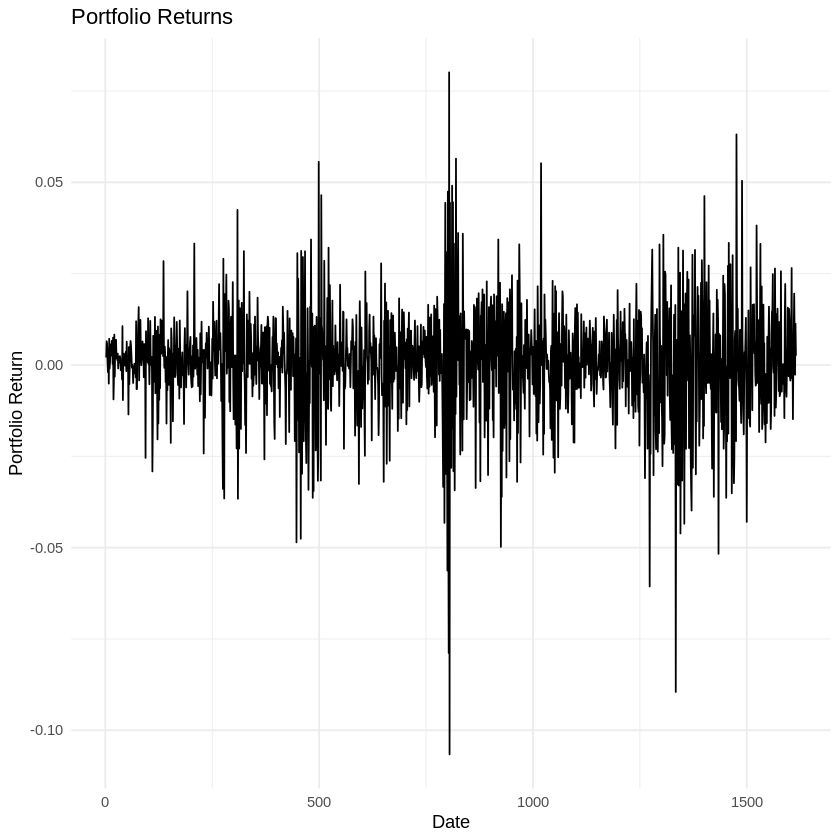

In [64]:
# Define portfolio weights
weights <- c(0.2, 0.2, 0.2, 0.2, 0.2)  # Equal weights for each stock

# Calculate the portfolio return
portfolio_returns <- rowSums(log_returns_df[, -1] * weights)

# Create a dataframe for portfolio returns
portfolio_returns_df <- data.frame(Date = index(log_returns_df),
                                   Portfolio_Return = coredata(portfolio_returns))

# Plot the portfolio returns
library(ggplot2)

ggplot(portfolio_returns_df, aes(x = Date, y = Portfolio_Return)) +
  geom_line() +
  labs(title = "Portfolio Returns", y = "Portfolio Return") +
  theme_minimal()




In [101]:
# Create a dataframe for the adjusted closing prices
closing_prices_df <- data.frame(Date = index(AAPL),
                                AAPL = coredata(AAPL),
                                GOOG = coredata(GOOG),
                                MSFT = coredata(MSFT),
                                NFLX = coredata(NFLX))

# Calculate monthly returns
library(dplyr)

portfolio_returns <- closing_prices_df %>%
  mutate(Month = format(Date, "%Y-%m")) %>%
  group_by(Month) %>%
  summarize(Portfolio_Return = sum(AAPL + GOOG + MSFT + NFLX)) %>%
  mutate(Portfolio_Return = Portfolio_Return / n())

# Print the resulting dataframe
head(portfolio_returns)


Month,Portfolio_Return
<chr>,<dbl>
2017-01,14578.17
2017-02,14578.17
2017-03,14578.17
2017-04,14578.17
2017-05,14578.17
2017-06,14578.17


In [102]:
# Calculate the 20-day moving average
moving_average <- SMA(Cl(AAPL), n = 20)

# Calculate the standard deviation
standard_deviation <- sd(Cl(AAPL))

# Generate buy and sell signals
buy_signal <- Cl(AAPL) > (moving_average + standard_deviation)
sell_signal <- Cl(AAPL) < (moving_average - standard_deviation)




In [104]:
# Calculate the 20-day moving average
moving_average <- SMA(Cl(AAPL), n = 20)

# Calculate the standard deviation
standard_deviation <- sd(Cl(AAPL))

# Generate buy and sell signals
buy_signal <- Cl(AAPL) < (moving_average - standard_deviation)
sell_signal <- Cl(AAPL) > (moving_average + standard_deviation)

# Combine the signals
signals <- ifelse(buy_signal, 1, ifelse(sell_signal, -1, 0))

# Create a dataframe with the dates and signals
signals_df <- data.frame(Date = index(AAPL), Signal = signals)

# Plot the closing prices and signals
library(ggplot2)

ggplot() +
  geom_line(data = data.frame(Date = index(AAPL), Close = coredata(Cl(AAPL))), aes(x = Date, y = Close), color = "blue") +
  geom_point(data = signals_df, aes(x = Date, y = coredata(Cl(AAPL)), color = factor(Signal)), size = 2) +
  labs(title = "Buy and Sell Signals", y = "Price", color = "Signal") +
  scale_color_manual(values = c("1" = "green", "-1" = "red", "0" = "gray")) +
  theme_minimal()


ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Close' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


In [105]:
# Calculate the 20-day moving average
moving_average <- SMA(Cl(AAPL), n = 20)

# Calculate the standard deviation
standard_deviation <- sd(Cl(AAPL))

# Generate buy and sell signals
buy_signal <- Cl(AAPL) < (moving_average - standard_deviation)
sell_signal <- Cl(AAPL) > (moving_average + standard_deviation)

# Combine the signals
signals <- ifelse(buy_signal, 1, ifelse(sell_signal, -1, 0))

# Create a dataframe with the dates and signals
signals_df <- data.frame(Date = index(AAPL), Signal = signals)

# Plot the closing prices and signals
library(ggplot2)

ggplot() +
  geom_line(data = data.frame(Date = index(AAPL), Close = coredata(Cl(AAPL))), aes(x = Date, y = Close), color = "blue") +
  geom_point(data = signals_df, aes(x = Date, y = Close, color = factor(Signal)), size = 2) +
  labs(title = "Buy and Sell Signals", y = "Price", color = "Signal") +
  scale_color_manual(values = c("1" = "green", "-1" = "red", "0" = "gray")) +
  theme_minimal()


ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Close' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


In [ ]:
# Calculate the 20-day moving average
moving_average <- SMA(AAPL$Close, n = 20)

# Calculate the standard deviation
standard_deviation <- sd(AAPL$Close)

# Generate buy and sell signals
buy_signal <- AAPL$Close < (moving_average - standard_deviation)
sell_signal <- AAPL$Close > (moving_average + standard_deviation)

# Combine the signals
signals <- ifelse(buy_signal, 1, ifelse(sell_signal, -1, 0))

# Create a dataframe with the dates and signals
signals_df <- data.frame(Date = index(AAPL), Signal = signals)

# Plot the closing prices and signals
library(ggplot2)

ggplot() +
  geom_line(data = data.frame(Date = index(AAPL), Close = coredata(AAPL$Close)), aes(x = Date, y = Close), color = "blue") +
  geom_point(data = signals_df, aes(x = Date, y = coredata(AAPL$Close), color = factor(Signal)), size = 2) +
  labs(title = "Buy and Sell Signals", y = "Price", color = "Signal") +
  scale_color_manual(values = c("1" = "green", "-1" = "red", "0" = "gray")) +
  theme_minimal()


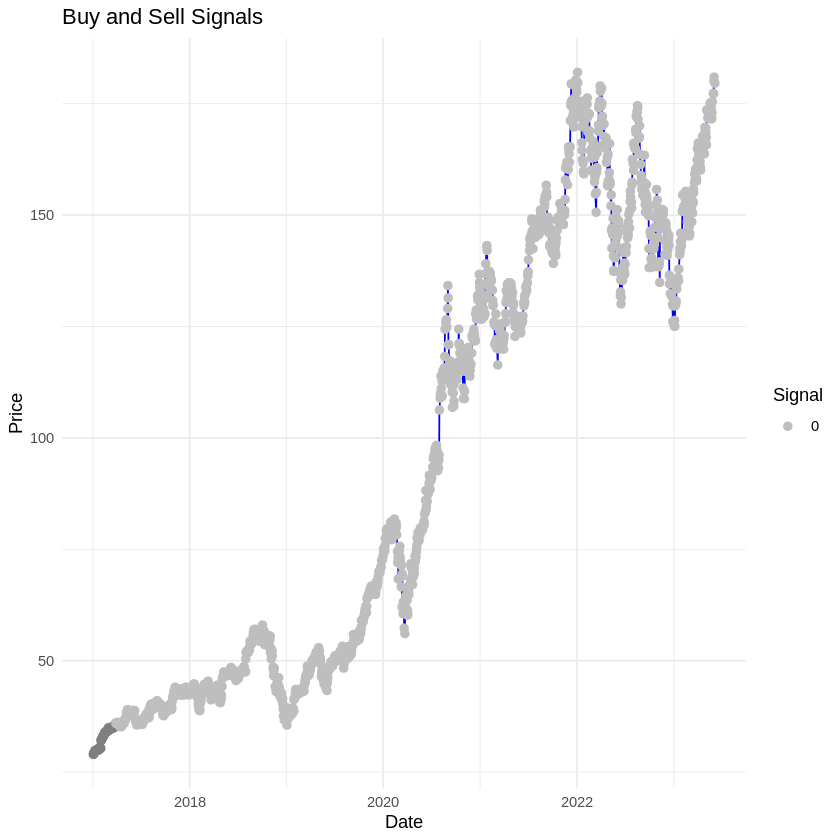

In [117]:
# Convert Close column to a vector
close_prices <- as.vector(AAPL$AAPL.Close)

# Calculate the 20-day moving average
moving_average <- SMA(close_prices, n = 60)

# Calculate the standard deviation
standard_deviation <- sd(close_prices)

# Generate buy and sell signals
buy_signal <- close_prices < (moving_average - standard_deviation)
sell_signal <- close_prices > (moving_average + standard_deviation)

# Combine the signals
signals <- ifelse(buy_signal, 1, ifelse(sell_signal, -1, 0))

# Create a dataframe with the dates and signals
signals_df <- data.frame(Date = index(AAPL), Signal = signals)

# Plot the closing prices and signals
library(ggplot2)

ggplot() +
  geom_line(data = data.frame(Date = index(AAPL), Close = coredata(close_prices)), aes(x = Date, y = Close), color = "blue") +
  geom_point(data = signals_df, aes(x = Date, y = coredata(close_prices), color = factor(Signal)), size = 2) +
  labs(title = "Buy and Sell Signals", y = "Price", color = "Signal") +
  scale_color_manual(values = c("1" = "green", "-1" = "red", "0" = "gray")) +
  theme_minimal()


In [110]:
AAPL

           AAPL.Close
2017-01-03    29.0375
2017-01-04    29.0050
2017-01-05    29.1525
2017-01-06    29.4775
2017-01-09    29.7475
2017-01-10    29.7775
2017-01-11    29.9375
2017-01-12    29.8125
2017-01-13    29.7600
2017-01-17    30.0000
       ...           
2023-05-22   174.2000
2023-05-23   171.5600
2023-05-24   171.8400
2023-05-25   172.9900
2023-05-26   175.4300
2023-05-30   177.3000
2023-05-31   177.2500
2023-06-01   180.0900
2023-06-02   180.9500
2023-06-05   179.5800

In [116]:
# Load the quantmod package
library(quantmod)

# Define the symbols
symbols <- c("AAPL", "GOOG", "MSFT", "NFLX")

# Fetch the historical data
getSymbols(symbols, from = "2017-01-01", to = Sys.Date())

# Create an empty data frame to store the adjusted close prices
prices <- data.frame(Date = index(AAPL), stringsAsFactors = FALSE)

# Loop through the symbols and extract adjusted close prices
for (symbol in symbols) {
  prices <- merge(prices, Ad(get(symbol)), by = "date", all = TRUE)
}

# Rename the columns
colnames(prices) <- c("Date", symbols)

# Calculate the log returns
log_returns <- diff(log(prices[, -1]))

# Calculate the cumulative returns
cumulative_returns <- cumprod(1 + log_returns) - 1

# Calculate the monthly returns of the portfolio
monthly_returns <- apply(log_returns, 1, function(x) sum(x, na.rm = TRUE))

# Calculate the 20-day moving average
moving_average <- SMA(prices$AAPL, n = 20)

# Calculate the standard deviation
standard_deviation <- StdDev(prices$AAPL, n = 20)

# Generate buy and sell signals
buy_signal <- prices$AAPL < (moving_average - standard_deviation)
sell_signal <- prices$AAPL > (moving_average + standard_deviation)

# Combine the signals
signals <- ifelse(buy_signal, -1, ifelse(sell_signal, 1, 0))

# Create a data frame with the dates and signals
signals_df <- data.frame(Date = index(prices), Signal = signals)

# Plot the closing prices and signals
library(ggplot2)

ggplot() +
  geom_line(data = prices, aes(x = Date, y = AAPL), color = "blue") +
  geom_point(data = signals_df, aes(x = Date, y = AAPL, color = factor(Signal)), size = 2) +
  labs(title = "Buy and Sell Signals", y = "Price", color = "Signal") +
  scale_color_manual(values = c("1" = "green", "-1" = "red", "0" = "gray")) +
  theme_minimal()


[1] "AAPL" "GOOG" "MSFT" "NFLX"

ERROR: ignored